In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn import linear_model
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from mpl_toolkits.basemap import Basemap

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [3]:
trip_data_1 = pd.read_csv("trip_data/trip_data_1.csv")

In [8]:
trip_fare_1 = pd.read_csv("trip_fare/trip_fare_1.csv")

In [43]:
trip_data_1.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,-73.978165,40.757977,-73.989838,40.751171
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,-74.006683,40.731781,-73.994499,40.750660
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,-74.004707,40.737770,-74.009834,40.726002
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,-73.974602,40.759945,-73.984734,40.759388
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,-73.976250,40.748528,-74.002586,40.747868


In [51]:
geolocator = Nominatim()
def get_location(lat,long):
    try:
        location = geolocator.reverse(str(lat)+","+str(long))
        return location.address
    except :
        return "Timeout"

C:\Users\MeAmit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.


In [5]:
trip_data_1['location'] = ''

In [14]:
#Grouping longs and lats

trip_data_1["latbin"] = trip_data_1.pickup_latitude.round(4)
trip_data_1["lonbin"] = trip_data_1.pickup_longitude.round(4)

In [15]:
groups = trip_data_1.groupby(["latbin", "lonbin"]).count()
groups.reset_index(level=0, inplace=True)
groups.head()

,,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,location
latbin,lonbin,,,,,,,,,,,,,,,
-3547.9207,0.0000,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
-3447.9197,-0.0017,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
-3447.9177,0.0000,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
-3447.9167,-0.0167,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1
-3181.0781,-73.9589,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1


In [55]:
top_locations = groups.loc[(abs(groups['latbin']) > 0) & (abs(groups['lonbin']) > 0)].sort_values(['medallion'], ascending = False).head(40)



,level_0,index,lonbin,latbin,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,location
234768,234768,234768,-73.9941,40.7512,8229,8229,8229,8229,4319,8229,8229,8229,8229,8229,8229,8229,8229,8229,8229
354504,354504,354504,-73.8745,40.7741,7817,7817,7817,7817,3268,7817,7817,7817,7817,7817,7817,7817,7817,7817,7817
352758,352758,352758,-73.8709,40.7737,7059,7059,7059,7059,2685,7059,7059,7059,7059,7059,7059,7059,7059,7059,7059
352759,352759,352759,-73.8708,40.7737,6944,6944,6944,6944,2793,6944,6944,6944,6944,6944,6944,6944,6944,6944,6944
9897,9897,9897,-73.7767,40.6454,6496,6496,6496,6496,2329,6496,6496,6496,6496,6496,6496,6496,6496,6496,6496
353199,353199,353199,-73.8709,40.7738,6249,6249,6249,6249,2574,6249,6249,6249,6249,6249,6249,6249,6248,6248,6249
354503,354503,354503,-73.8746,40.7741,5938,5938,5938,5938,3158,5938,5938,5938,5938,5938,5938,5938,5938,5938,5938
235274,235274,235274,-73.9940,40.7513,5755,5755,5755,5755,2392,5755,5755,5755,5755,5755,5755,5755,5755,5755,5755
9768,9768,9768,-73.7767,40.6453,5613,5613,5613,5613,2168,5613,5613,5613,5613,5613,5613,5613,5613,5613,5613
354519,354519,354519,-73.8730,40.7741,5494,5494,5494,5494,2042,5494,5494,5494,5494,5494,5494,5494,5494,5494,5494


In [56]:
top_locations['location'] = top_locations.apply(lambda x: get_location(x['latbin'],x['lonbin']), axis = 1)

In [62]:
top_locations['location'].to_csv("addresses.csv")
top_locations['location'].unique()

array(['Chelsea, Manhattan, Manhattan Community Board 5, New York County, NYC, New York, 10017, USA',
       'LaGuardia Airport, C5, North Beach, Queens County, NYC, New York, 11369, USA',
       'Timeout',
       'John F. Kennedy International Airport, Terminal 5 Arrivals, Bayswater, Queens County, NYC, New York, 11430, USA',
       'East Elmhurst, Queens County, NYC, New York, 11369, USA',
       '2, 7th Avenue, Chelsea, Manhattan, Manhattan Community Board 5, New York County, NYC, New York, 10001, USA',
       'Hudson River Greenway, Hudson Yards, Manhattan, Manhattan Community Board 4, New York County, NYC, New York, NY  10011, USA',
       'Hotel Pennsylvania, 401, 7th Avenue, Chelsea, Manhattan, Manhattan Community Board 5, New York County, NYC, New York, 10001-2062, USA',
       '416, 8th Avenue, Chelsea, Manhattan, Manhattan Community Board 4, New York County, NYC, New York, 10001, USA',
       'Track 17, West 33rd Street, Chelsea, Manhattan, Manhattan Community Board 5, New Yo

In [80]:
#plotting busy locations
from mpl_toolkits.basemap import Basemap

map = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

cities = [["New York",5]]
# load the shapefile, use the name 'states'
map.readshapefile('st99_d00', name='states', drawbounds=True)

# Get the location of each city and plot it
geolocator = Nominatim()
for (city,count) in cities:
    loc = geolocator.geocode(city)
    x, y = map(loc.longitude, loc.latitude)
    map.plot(x,y,marker='o',color='Red',markersize=int(math.sqrt(count))*scale)
plt.show()

KeyError: 'PROJ_LIB'

In [5]:
trip_fare_1.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0.0,0.0,10.5


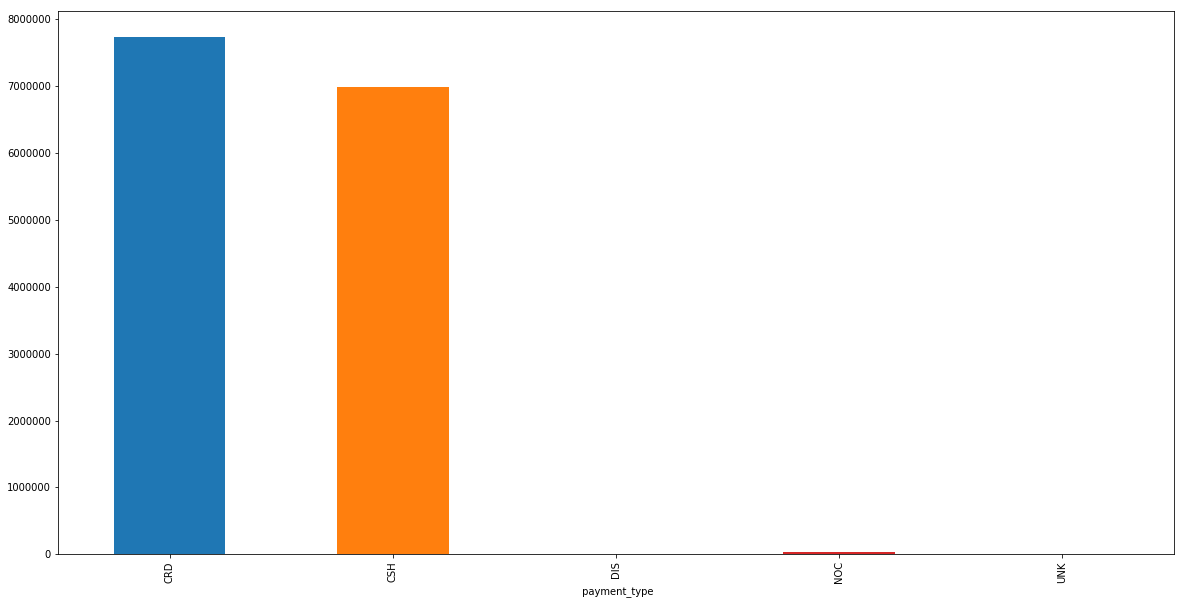

In [12]:
df = trip_fare_1.groupby(' payment_type').count()
df['medallion'].plot(kind = 'bar', figsize = (20,10))

In [32]:
trip_data_1['pickup_datetime'] = pd.to_datetime(trip_data_1['pickup_datetime'])
trip_data_1['dropoff_datetime'] = pd.to_datetime(trip_data_1['dropoff_datetime'])

In [45]:
trip_fare_1[' pickup_datetime'] = pd.to_datetime(trip_fare_1[' pickup_datetime'])

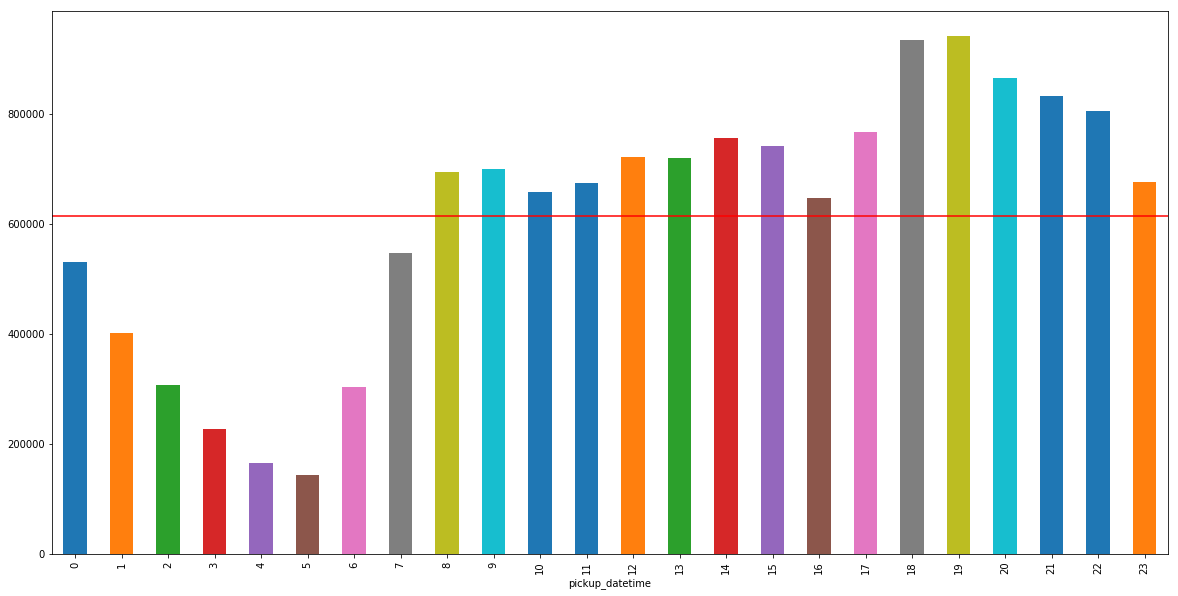

In [34]:
df = trip_data_1.groupby(trip_data_1['pickup_datetime'].dt.hour).count()
plt = df['medallion'].plot.bar(figsize = (20,10))
mean = df['medallion'].mean()
plt.axhline(mean, color='r')

In [62]:
trip_fare_data  = pd.concat([trip_data_1, trip_fare_1], axis=1, join_axes=[trip_data_1.index])
#trip_fare_data.to_csv("trip_data_fare_merged.csv", index = False)
trip_fare_data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,BA96DE419E711691B9445D6A6307C170,CMT,2013-01-01 15:11:48,CSH,6.5,0.0,0.5,0.0,0.0,7.0
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-06 00:18:35,CSH,6.0,0.5,0.5,0.0,0.0,7.0
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,2013-01-05 18:49:41,CSH,5.5,1.0,0.5,0.0,0.0,7.0
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:54:15,CSH,5.0,0.5,0.5,0.0,0.0,6.0
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,51EE87E3205C985EF8431D850C786310,CMT,2013-01-07 23:25:03,CSH,9.5,0.5,0.5,0.0,0.0,10.5


In [66]:
trip_fare_data = pd.read_csv('trip_data_fare_merged.csv')

In [3]:
trip_fare_data.shape

(14776615, 25)

In [15]:
trip_data_1.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude'],
      dtype='object')

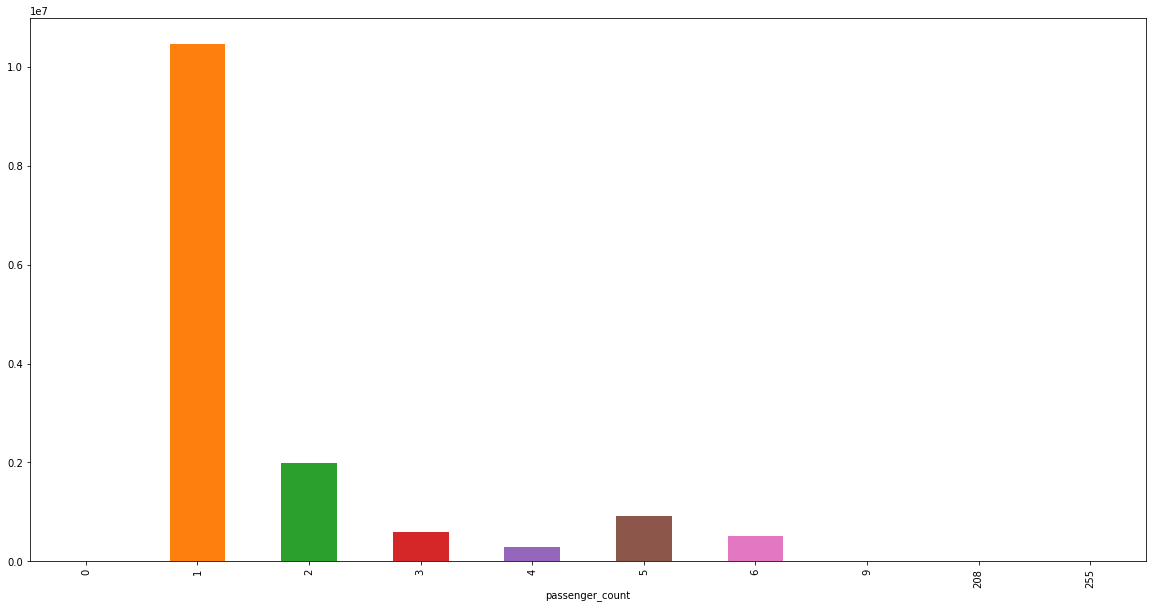

In [19]:
trip_data_1.groupby(trip_data_1['passenger_count']).count()['medallion'].plot.bar(figsize = (20,10))

In [20]:
trip_data_1.passenger_count.unique()

array([  4,   1,   2,   3,   5,   6,   0, 208,   9, 255], dtype=int64)

In [22]:
trip_data_1[trip_data_1['passenger_count'] == 0].shape

(166, 14)

In [23]:
trip_data_1[trip_data_1['passenger_count'] == 208].shape

(1, 14)

In [24]:
trip_data_1[trip_data_1['passenger_count'] == 255].shape

(1, 14)

In [64]:
trip_data_1[trip_data_1['passenger_count'] == 9].shape

(1, 17)

In [33]:
trip_fare_1.columns

Index(['medallion', ' hack_license', ' vendor_id', ' pickup_datetime',
       ' payment_type', ' fare_amount', ' surcharge', ' mta_tax',
       ' tip_amount', ' tolls_amount', ' total_amount'],
      dtype='object')

In [41]:
trip_fare_1[' fare_amount'].describe()

count    1.477662e+07
mean     1.166472e+01
std      9.639219e+00
min      2.500000e+00
25%      6.500000e+00
50%      9.000000e+00
75%      1.300000e+01
max      5.000000e+02
Name:  fare_amount, dtype: float64

In [25]:
df = trip_fare_1[trip_fare_1[' fare_amount'] < 100]

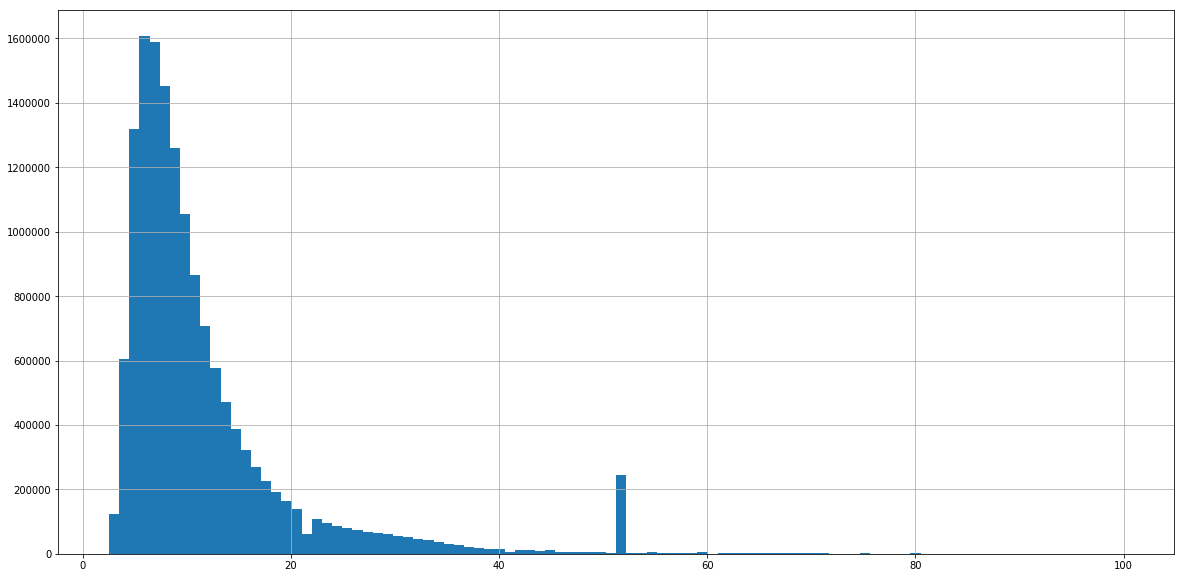

In [29]:
df[' fare_amount'].hist(bins = 100,figsize = (20,10))

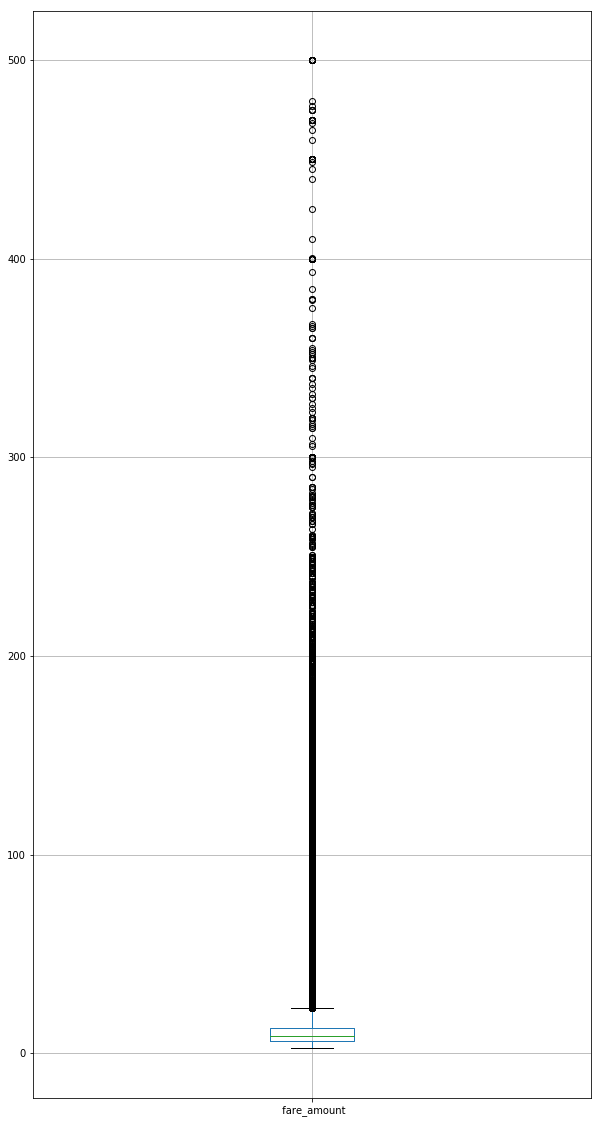

In [32]:
trip_fare_1.boxplot(column = [' fare_amount'],figsize = (10,20))

In [40]:
trip_fare_1[' tip_amount'].describe()

count    1.477662e+07
mean     1.267509e+00
std      2.046084e+00
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e-01
75%      2.000000e+00
max      2.000000e+02
Name:  tip_amount, dtype: float64

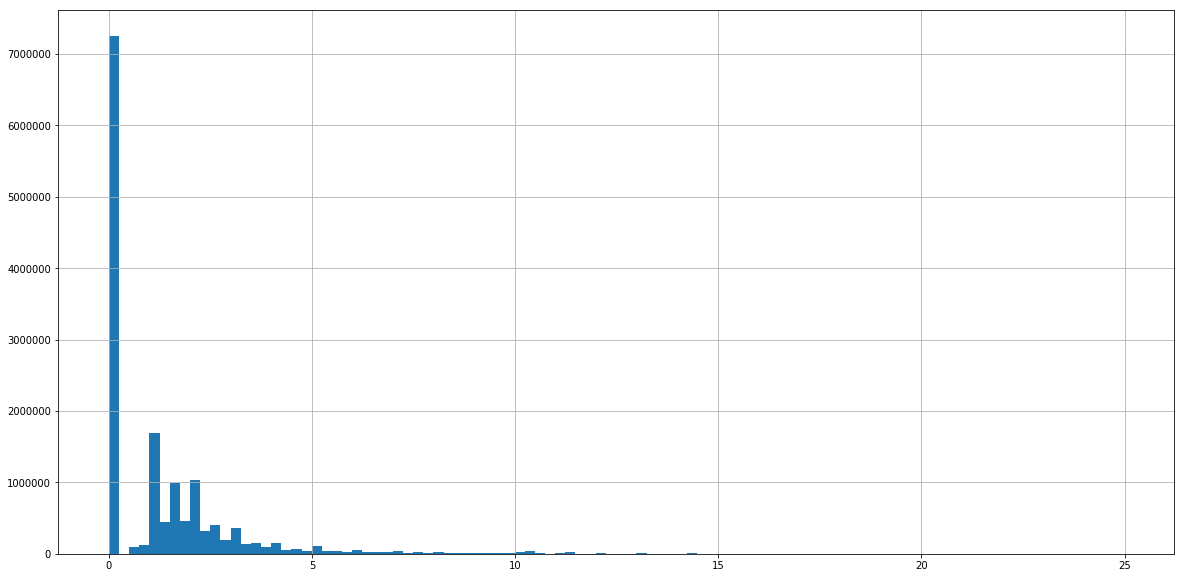

In [42]:
df = trip_fare_1[trip_fare_1[' tip_amount'] < 25]
df[' tip_amount'].hist(bins = 100,figsize = (20,10))

In [33]:
trip_fare_data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'medallion.1', ' hack_license', ' vendor_id',
       ' pickup_datetime', ' payment_type', ' fare_amount', ' surcharge',
       ' mta_tax', ' tip_amount', ' tolls_amount', ' total_amount',
       'pickup_dayofweek', 'pickup_weekday_name', 'pickup_hour',
       'pickup_month', 'shift_type'],
      dtype='object')

In [35]:
df = trip_fare_data.groupby(trip_fare_data['pickup_datetime'].dt.hour)[' total_amount'].mean()

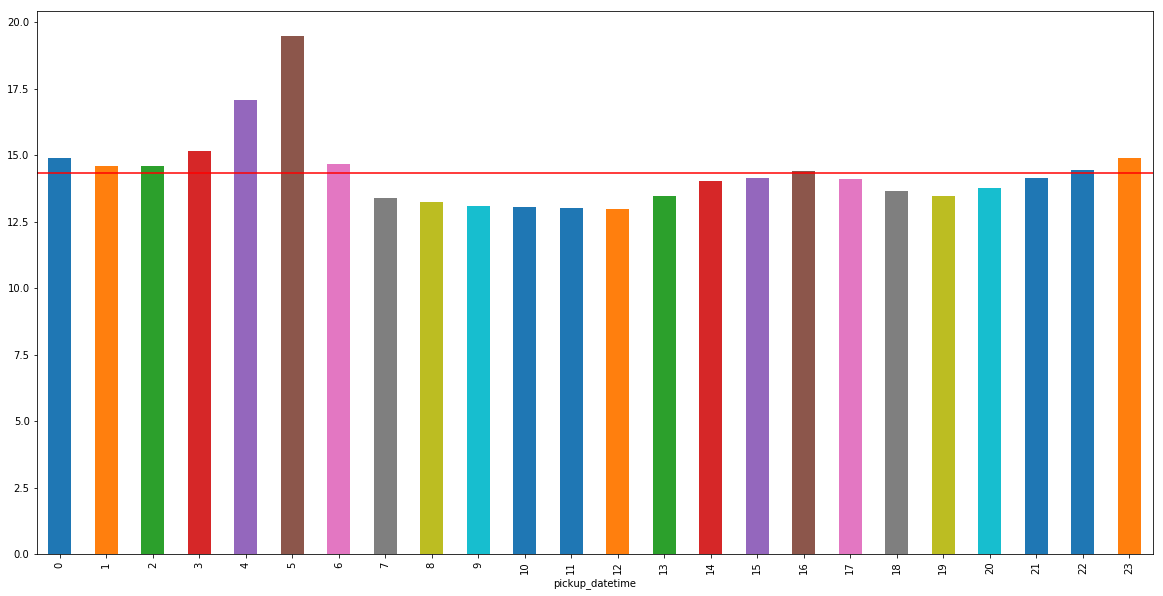

In [38]:
plt = df.plot(kind = 'bar', figsize = (20,10))
mean = df.mean()
plt.axhline(mean, color='r')

In [6]:
trip_fare_data.columns

Index(['medallion', 'hack_license', 'vendor_id', 'rate_code',
       'store_and_fwd_flag', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'trip_time_in_secs', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'medallion.1', ' hack_license', ' vendor_id',
       ' pickup_datetime', ' payment_type', ' fare_amount', ' surcharge',
       ' mta_tax', ' tip_amount', ' tolls_amount', ' total_amount'],
      dtype='object')

In [67]:
corrs = trip_fare_data[['passenger_count','trip_time_in_secs','trip_distance',' fare_amount',' surcharge',' tip_amount',' tolls_amount',' total_amount']].corr()

In [75]:
corrs.iloc[[3,5]]

,index,passenger_count,trip_time_in_secs,trip_distance,fare_amount,surcharge,tip_amount,tolls_amount,total_amount
3,fare_amount,0.008418,0.799284,0.876499,1.000000,-0.064441,0.526972,0.574409,0.983939
5,tip_amount,-0.011056,0.422780,0.474153,0.526972,-0.011311,1.000000,0.374924,0.654664


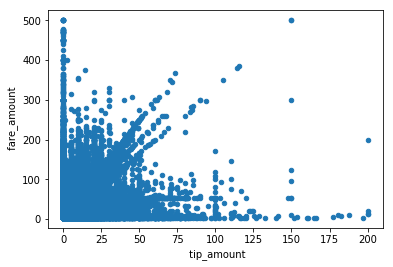

In [12]:
trip_fare_data.plot.scatter(y = ' fare_amount',x= ' tip_amount',figsize = (15,15))

In [76]:
#Model to predict fare
y = trip_fare_data[' fare_amount'] ## X usually means our input variables (or independent variables)
X = trip_fare_data[['passenger_count','trip_distance']] ## Y usually means our output/dependent variable

# Print out the statistics
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.score(X,y)

0.768267064980693

In [78]:
y = trip_fare_data[' tip_amount'] ## X usually means our input variables (or independent variables)
X = trip_fare_data[[' total_amount', 'trip_time_in_secs']] ## Y usually means our output/dependent variable

# Print out the statistics
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.score(X,y)

0.44901386296293944

In [79]:
print(lm.coef_)
print(lm.intercept_)

[ 0.14883018 -0.00094882]
-0.16066794419738706


In [7]:
def get_shift_type(pickup_hour):
    if(pickup_hour > 8 and pickup_hour < 19):
        return "day_shift"
    elif(pickup_hour > 18 or pickup_hour < 3):
        return "night_shift"
    else:
        return "late_night_shift"

In [31]:
trip_fare_data['pickup_datetime'] = pd.to_datetime(trip_fare_data['pickup_datetime'])
trip_fare_data['dropoff_datetime'] = pd.to_datetime(trip_fare_data['dropoff_datetime'])

In [5]:
trip_fare_data["pickup_dayofweek"] = trip_fare_data.pickup_datetime.dt.dayofweek
trip_fare_data["pickup_weekday_name"] = trip_fare_data.pickup_datetime.dt.weekday_name
trip_fare_data["pickup_hour"] = trip_fare_data.pickup_datetime.dt.hour

In [8]:
trip_fare_data["shift_type"] = trip_fare_data.pickup_hour.apply(lambda x: get_shift_type(x))

In [9]:
trip_fare_data.to_csv("trip_data_fare_merged.csv", index = False)

In [28]:
trip_fare_data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,...,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_dayofweek,pickup_weekday_name,pickup_hour,pickup_month,shift_type
0,89D227B655E5C82AECF13C3F540D4CF4,BA96DE419E711691B9445D6A6307C170,CMT,1,N,2013-01-01 15:11:48,2013-01-01 15:18:10,4,382,1.0,...,0.0,0.5,0.0,0.0,7.0,1,Tuesday,15,1,day_shift
1,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-06 00:18:35,2013-01-06 00:22:54,1,259,1.5,...,0.5,0.5,0.0,0.0,7.0,6,Sunday,0,1,night_shift
2,0BD7C8F5BA12B88E0B67BED28BEA73D8,9FD8F69F0804BDB5549F40E9DA1BE472,CMT,1,N,2013-01-05 18:49:41,2013-01-05 18:54:23,1,282,1.1,...,1.0,0.5,0.0,0.0,7.0,5,Saturday,18,1,day_shift
3,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:54:15,2013-01-07 23:58:20,2,244,0.7,...,0.5,0.5,0.0,0.0,6.0,0,Monday,23,1,night_shift
4,DFD2202EE08F7A8DC9A57B02ACB81FE2,51EE87E3205C985EF8431D850C786310,CMT,1,N,2013-01-07 23:25:03,2013-01-07 23:34:24,1,560,2.1,...,0.5,0.5,0.0,0.0,10.5,0,Monday,23,1,night_shift


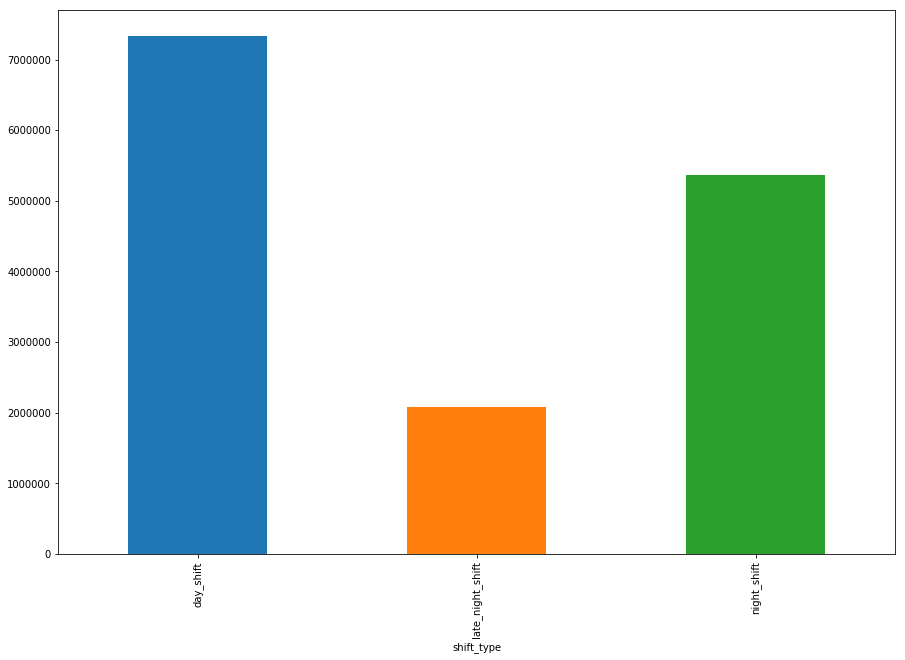

In [10]:
df = trip_fare_data.groupby("shift_type").count()
df['medallion'].plot(kind = 'bar', figsize = (15,10))

In [39]:
df = trip_fare_data.groupby('pickup_weekday_name').count()
df.index = pd.Categorical(df.index, categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

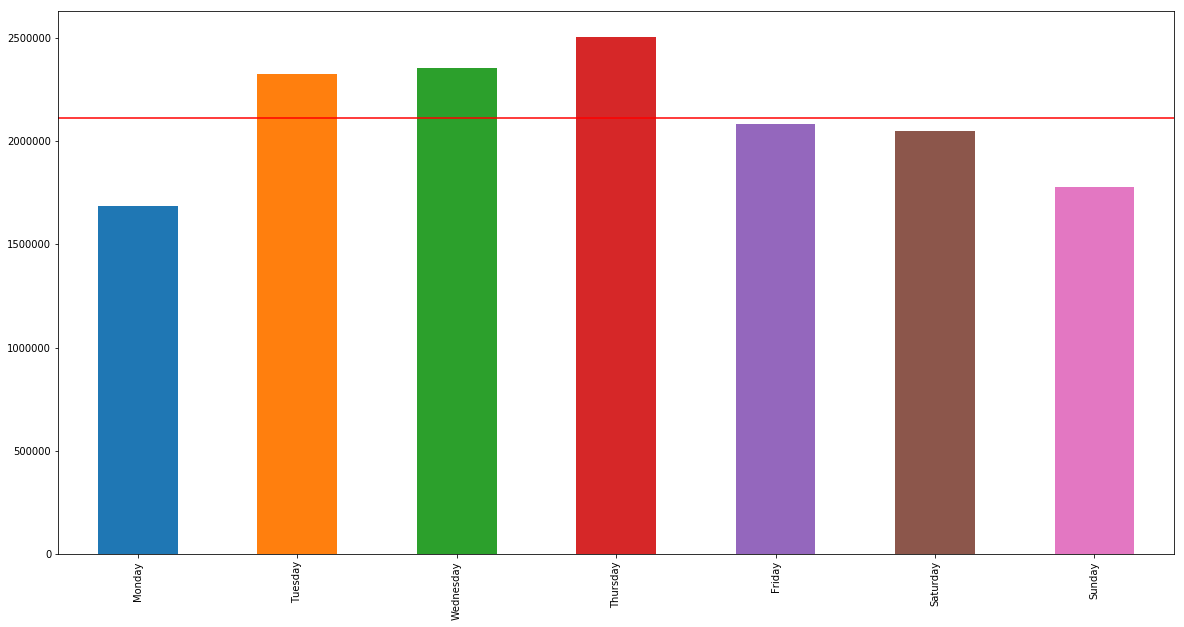

In [41]:
plt = df.sort_index()['medallion'].plot(kind = 'bar', figsize= (20,10))
mean = df['medallion'].mean()
plt.axhline(mean, color='r')

In [21]:
weekday_encodings = pd.get_dummies(trip_fare_data['pickup_weekday_name'])
weekday_encodings.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [22]:
shift_type_encodings = pd.get_dummies(trip_fare_data['shift_type'])
shift_type_encodings.head()

,day_shift,late_night_shift,night_shift
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1


In [25]:
#Checking relation between fare amount and day of week
y = trip_fare_data[' fare_amount'] ## X usually means our input variables (or independent variables)
X = weekday_encodings ## Y usually means our output/dependent variable

# Print out the statistics
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
lm.score(X,y)

0.0002745813299895872

In [26]:
#Checking relation between tip amount and day of week
y = trip_fare_data[' tip_amount'] ## X usually means our input variables (or independent variables)
X = weekday_encodings ## Y usually means our output/dependent variable

model = lm.fit(X,y)
lm.score(X,y)

0.0008023671789991749

In [27]:
#Checking relation between tip amount and shift type
y = trip_fare_data[' tip_amount'] ## X usually means our input variables (or independent variables)
X = shift_type_encodings ## Y usually means our output/dependent variable

model = lm.fit(X,y)
lm.score(X,y)

0.0010264953429843793

In [28]:
#Checking relation between fare amount and shift type
y = trip_fare_data[' fare_amount'] ## X usually means our input variables (or independent variables)
X = shift_type_encodings ## Y usually means our output/dependent variable

model = lm.fit(X,y)
lm.score(X,y)

0.0008118100971037379